# 📉📊📈**Comparing the Performance of Various Machine Learning Models for SLT Stock Price Prediction**📉📊📈


# ✅ **Linear Regression** ✅

Linear regression is a statistical method that models the relationship between two variables using a linear equation. One variable is considered explanatory (X), and the other is dependent (Y). For example, it can be used to study how height (X) affects weight (Y) by estimating the best-fitting line through observed data. Linear regression is a common technique in data analysis, machine learning, and statistical modeling, providing insights into the direction and strength of the relationship between variables.

# **Import Libraries**

In [52]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# **Load Dataset into the Data Frame**

In [53]:
# Import the dataset
dataset = pd.read_csv(r"..\1. dataset\TeleCom_2009_2023_Daily.csv")

# View Columns
dataset.head(100)

,Date,Price,Open,High,Low,Vol.,Change %
0,7/8/2009,46.50,48.0,48.0,46.50,9.90K,-0.53%
1,7/9/2009,46.00,47.0,47.0,45.75,17.40K,-1.08%
2,7/13/2009,45.75,46.0,47.0,45.75,22.10K,-0.54%
3,7/14/2009,45.75,45.5,46.0,45.00,20.60K,0.00%
4,7/15/2009,45.50,45.5,46.0,45.25,23.60K,-0.55%
...,...,...,...,...,...,...,...
95,11/25/2009,40.00,40.5,41.0,39.50,19.80K,-1.23%
96,11/26/2009,39.75,40.0,40.0,39.75,15.00K,-0.63%
97,11/27/2009,40.00,40.0,40.0,39.50,16.60K,0.63%
98,11/30/2009,41.25,40.5,42.0,40.25,8.20K,3.13%


# **Dataset Preprocessing**

In [54]:
#Preprocess data
#normalize and scale data
dataset['Open_Close'] = (dataset['Open'] - dataset['Price'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Increase_Decrease'] = np.where(dataset['Vol.'].shift(-1) > dataset['Vol.'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Price'].shift(-1) > dataset['Price'],1,0)
dataset['Returns'] = dataset['Price'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %,Open_Close,High_Low,Buy_Sell_on_Open,Increase_Decrease,Buy_Sell,Returns
1,7/9/2009,46.00,47.00,47.0,45.75,17.40K,-1.08%,0.021277,0.027322,0,1,0,-0.010753
2,7/13/2009,45.75,46.00,47.0,45.75,22.10K,-0.54%,0.005435,0.027322,0,0,0,-0.005435
3,7/14/2009,45.75,45.50,46.0,45.00,20.60K,0.00%,-0.005495,0.022222,0,1,0,0.000000
4,7/15/2009,45.50,45.50,46.0,45.25,23.60K,-0.55%,0.000000,0.016575,0,1,0,-0.005464
5,7/16/2009,45.00,45.25,45.5,44.75,42.20K,-1.10%,0.005525,0.016760,0,1,1,-0.010989


# **View Dataset**

In [55]:
# view dataset
dataset

,Date,Price,Open,High,Low,Vol.,Change %,Open_Close,High_Low,Buy_Sell_on_Open,Increase_Decrease,Buy_Sell,Returns
1,7/9/2009,46.00,47.00,47.00,45.75,17.40K,-1.08%,0.021277,0.027322,0,1,0,-0.010753
2,7/13/2009,45.75,46.00,47.00,45.75,22.10K,-0.54%,0.005435,0.027322,0,0,0,-0.005435
3,7/14/2009,45.75,45.50,46.00,45.00,20.60K,0.00%,-0.005495,0.022222,0,1,0,0.000000
4,7/15/2009,45.50,45.50,46.00,45.25,23.60K,-0.55%,0.000000,0.016575,0,1,0,-0.005464
5,7/16/2009,45.00,45.25,45.50,44.75,42.20K,-1.10%,0.005525,0.016760,0,1,1,-0.010989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,4/4/2023,91.50,90.60,92.80,89.60,303.49K,0.66%,-0.009934,0.035714,1,1,1,0.006601
3235,4/6/2023,102.00,92.10,102.00,92.00,734.22K,11.48%,-0.107492,0.108696,1,0,0,0.114754
3236,4/10/2023,98.00,100.00,102.75,97.30,152.39K,-3.92%,0.020000,0.056012,0,1,1,-0.039216
3237,4/11/2023,101.50,97.90,103.50,97.30,329.43K,3.57%,-0.036772,0.063720,1,0,0,0.035714


# **Dataset Cleaning and Null Value Testing**

In [56]:
# view how many null values in each column
dataset.isnull().sum()

Date                 0
Price                0
Open                 0
High                 0
Low                  0
Vol.                 0
Change %             0
Open_Close           0
High_Low             0
Buy_Sell_on_Open     0
Increase_Decrease    0
Buy_Sell             0
Returns              0
dtype: int64

<AxesSubplot:>

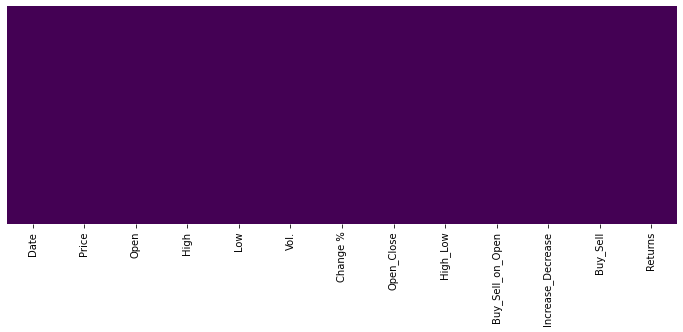

In [79]:
#Display a heatmap on null values
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')


# **Analyze the Dataset**

In [58]:
# view number of rows, number of columns
dataset.shape

(3220, 13)

In [59]:
# total number of records
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  41860


In [60]:
# view columns names
dataset.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %',
       'Open_Close', 'High_Low', 'Buy_Sell_on_Open', 'Increase_Decrease',
       'Buy_Sell', 'Returns'],
      dtype='object')

In [61]:
# view data types of the columns
dataset.dtypes

Date                  object
Price                float64
Open                 float64
High                 float64
Low                  float64
Vol.                  object
Change %              object
Open_Close           float64
High_Low             float64
Buy_Sell_on_Open       int32
Increase_Decrease      int32
Buy_Sell               int32
Returns              float64
dtype: object

In [62]:
# view dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 1 to 3238
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3220 non-null   object 
 1   Price              3220 non-null   float64
 2   Open               3220 non-null   float64
 3   High               3220 non-null   float64
 4   Low                3220 non-null   float64
 5   Vol.               3220 non-null   object 
 6   Change %           3220 non-null   object 
 7   Open_Close         3220 non-null   float64
 8   High_Low           3220 non-null   float64
 9   Buy_Sell_on_Open   3220 non-null   int32  
 10  Increase_Decrease  3220 non-null   int32  
 11  Buy_Sell           3220 non-null   int32  
 12  Returns            3220 non-null   float64
dtypes: float64(7), int32(3), object(3)
memory usage: 314.5+ KB


In [63]:
# view the statistics per each column
dataset.describe()

,Price,Open,High,Low,Open_Close,High_Low,Buy_Sell_on_Open,Increase_Decrease,Buy_Sell,Returns
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,40.154593,40.143665,40.823121,39.381957,-0.000795,0.035220,0.404658,0.494099,0.397516,0.000611
std,11.408266,11.433600,11.826151,11.047338,0.027285,0.028890,0.490902,0.500043,0.489460,0.027126
min,19.000000,19.000000,19.500000,18.000000,-0.252632,0.000000,0.000000,0.000000,0.000000,-0.154489
25%,32.500000,32.600000,33.000000,32.000000,-0.012658,0.017544,0.000000,0.000000,0.000000,-0.012244
50%,39.000000,39.000000,39.750000,38.300000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000
75%,47.000000,46.900000,47.500000,46.000000,0.011511,0.045369,1.000000,1.000000,1.000000,0.010815
max,113.750000,115.000000,121.750000,111.500000,0.141667,0.322222,1.000000,1.000000,1.000000,0.248815


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Open_Close'}>,
        <AxesSubplot:title={'center':'High_Low'}>],
       [<AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>],
       [<AxesSubplot:title={'center':'Returns'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

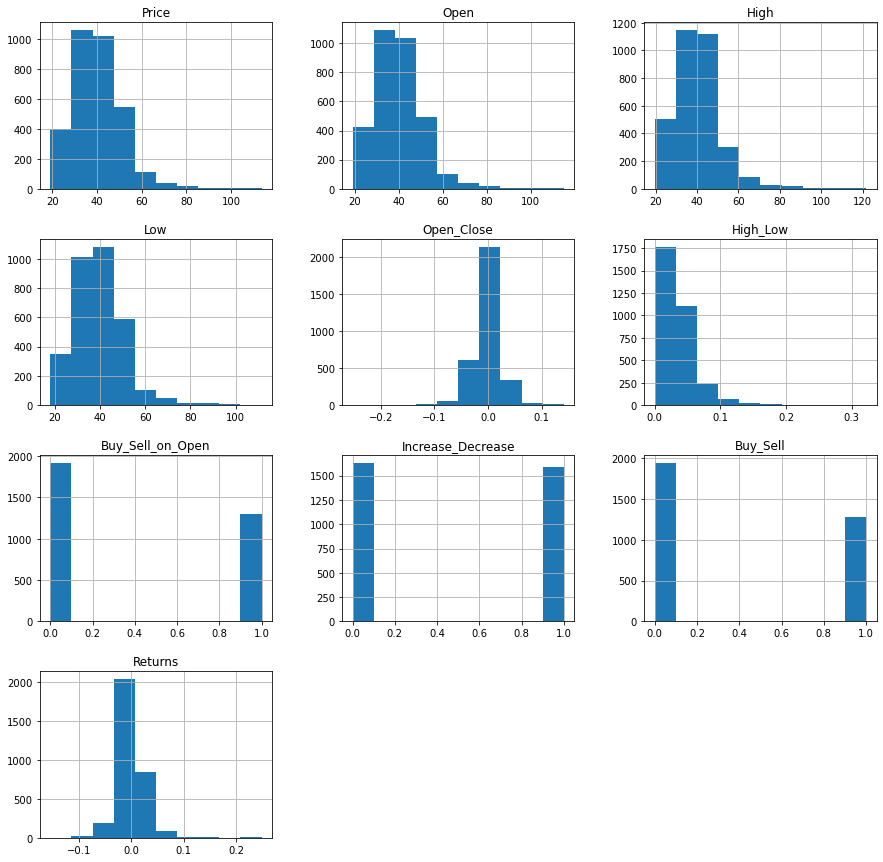

In [64]:
# view the histogram per each numerical column
dataset.hist(figsize=(15, 15))

<AxesSubplot:xlabel='Price', ylabel='Density'>

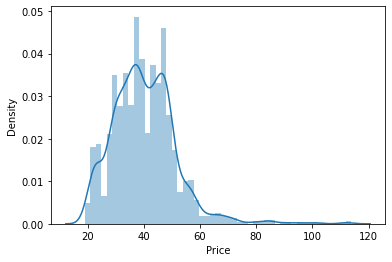

In [65]:
#Distribution plot on stock price
sns.distplot(dataset['Price'])

<AxesSubplot:>

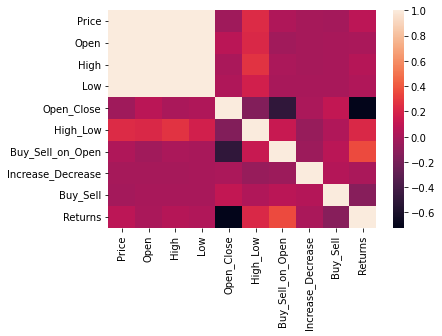

In [66]:
#correlation matrix
sns.heatmap(dataset.corr())

# **Define X and Y**

In [67]:
#Define x
X = dataset[['Open', 'High', 'Low', 'Open_Close', 'High_Low', 'Returns']]

#Define y
y = dataset['Price']

# **Split Train Dataset and Test Dataset**

In [68]:
#Split dataset into train (60%) and test (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.4, random_state=101)

# **Dataset Traning and Model Traning**

In [69]:
#Applying linear regression on train data
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [70]:
print(lm.intercept_)

0.4588391394981741


In [71]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns={'Coefficient'})
coeff_df

,Coefficient
Open,0.483592
High,0.437740
Low,0.067277
Open_Close,-30.118803
High_Low,-7.650455
Returns,2.044344


# **Comparison of Actual Values and Predicted Values**

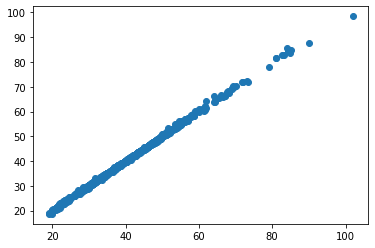

In [72]:
#Compare actual values with predicted values
y_pred = lm.predict(X_test)
plt.scatter(y_test,y_pred)
plt.savefig("Figure: Comparison of Actual Values and Predictions Values")

In [73]:
Actual values vs predicted values table
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df.head())
print(df.tail())

      Actual  Predicted
1637    41.1  41.522742
566     47.8  47.746856
896     43.0  42.945534
2660    33.1  33.451342
821     43.0  42.957899
      Actual  Predicted
2268    24.0  24.874780
1744    36.5  36.661761
435     58.8  58.746052
203     38.0  38.199445
328     45.8  45.767569


<AxesSubplot:xlabel='Price', ylabel='Density'>

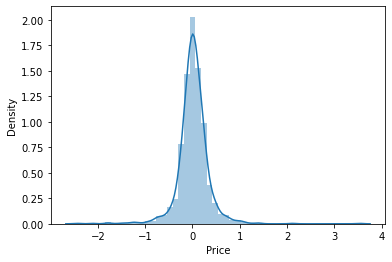

In [74]:
#distribution plot between test data and predicted data
sns.distplot((y_test-y_pred),bins=50)

In [75]:
#Display shapes of test values and predicted values
print(y_test.shape)
print(y_pred.shape)

(1288,)
(1288,)


In [76]:
#Getting cross validation scores on trained model
lm_fit = lm.fit(X_train, y_train)
lm_scores = cross_val_score(lm_fit, X_train, y_train, cv = 5)

print("Mean cross validation score: {}".format(np.mean(lm_scores)))
print("Score without cv: {}".format(lm_fit.score(X_train, y_train)))

Mean cross validation score: 0.9988210593054699
Score without cv: 0.9990637960376485


# **Accuracy and Loss Function Values of the Model**

In [77]:
#Calculating error metrics to analyse model performance
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 0.20613789741079247
Mean_Squared_Error(MSE): 0.1069481595848133
Root_Mean_Squared_Error(RMSE): 0.32702929468904357


In [78]:
#Display accuracy score
print("Accuracy score: {:.7f}".format(lm.score(X_test, y_test)))

Accuracy score: 0.9990431
